# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv(r'bank-data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()
# Removes the index column thata comes with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
data['y'] = data['y'].map({'yes':1, 'no':0})
data

In [4]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.2121
Time:                        08:31:05   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

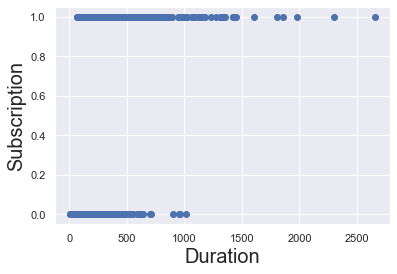

In [8]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [10]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']

In [11]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.515     
Dependent Variable: y                AIC:              362.0356  
Date:               2020-10-20 08:49 BIC:              391.7855  
No. Observations:   518              Log-Likelihood:   -174.02   
Df Model:           6                LL-Null:          -359.05   
Df Residuals:       511              LLR p-value:      7.5788e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.1385   0.3395 -0.4080 0.6833 -0.8039  0.5269
interest_rate     -0.7802   0.0921 -8.4712 0.0000 -0.9607 -0.5997
credit             2.4028   1.0895  2.2053 0.0274  0.2673  4.5382
march             -1.8097   0.3315 -5.4585 0.0000 -2.4594 -1.1599
may                0.1946   0.2293  0.8488 0.3960 -0.2548  0.6440
previous           1.2746   0.5831  2.1861 0.0288  0.1319  2.4174
duration           0.0070   0.0007  9.3864 0.0000  0.0055  0.0084
=================================================================

"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [12]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [13]:
confusion_matrix(X_all,y,results_logit)

(array([[220.,  39.],
        [ 31., 228.]]),
 0.8648648648648649)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [14]:
# We have to load data our model has never seen before.
raw_data2 = pd.read_csv('Bank-data-testing.csv')
data_test = raw_data2.copy()
# Removes the index column thata comes with the data
data_test = data_test.drop(['Unnamed: 0'], axis = 1)

In [15]:
# Coverting the outcome variable into 1s and 0s again. 
data_test['y'] = data_test['y'].map({'yes':1, 'no':0})
data_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [16]:
y_test = data_test['y']
# We already declared a list called 'estimators' that holds all relevant estimators for our model. 
X1_test = data_test[estimators]
X_test = sm.add_constant(X1_test)

In [17]:
# Determine the Confusion Matrix and the accuracy of the model with 
#the new data. Note that the model itself stays the same (results_logit).

# test accuracy
confusion_matrix(X_test, y_test, results_logit)

(array([[94., 17.],
        [12., 99.]]),
 0.8693693693693694)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [18]:
# Compare these values to the Confusion Matrix and the accuracy of the model with the old data.
# train accuracy
confusion_matrix(X_all,y, results_logit)

(array([[220.,  39.],
        [ 31., 228.]]),
 0.8648648648648649)

Looking at the test acccuracy we see a number which is a tiny but lower: 86.04%, compared to 86.29% for train accuracy. 

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.

Note that when you run the regression, you may get different numbers than us!